### Introdução à plotagem

Objetivos:
- matplotlib
- seaborn
- Plotagem no Panda

Para trabalhar com a visualização de dados utilizaremos o conjunto de **Anscombe** presente na biblioteca **seaborn**<br>
[https://seaborn.pydata.org/](https://seaborn.pydata.org/)

In [1]:
# importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Conjunto de dados de Anscombe
anscombe = sns.load_dataset("anscombe")
# print(anscombe)

In [3]:
# Cria um subconjunto dos dados
# Contém somente o primeiro conjunto de dados de Anscombe
dataset_1 = anscombe[anscombe["dataset"] == "I"]
# dataset_1


In [4]:
# Poltar o gráfico referente ao primeiro conjunto de dados de anscombe
# plt.plot(dataset_1["x"], dataset_1["y"])

Por padrão `plt.plot()` desenhará linhas, se quisermos alterar basta passar o padrão desejado

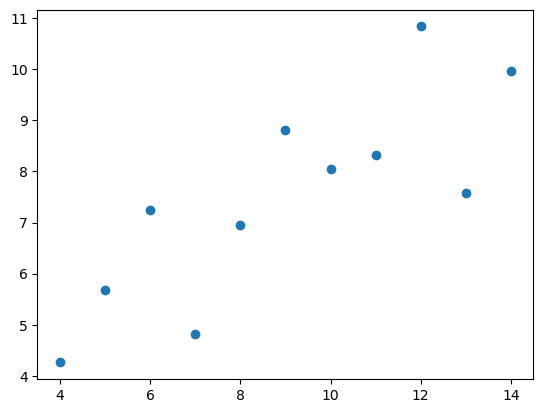

In [5]:
plt.plot(dataset_1["x"], dataset_1["y"], "o")

In [6]:
# Repetir o processo para os demais dataset
dataset_2 = anscombe[anscombe["dataset"] == "II"]
dataset_3 = anscombe[anscombe["dataset"] == "III"]
dataset_4 = anscombe[anscombe["dataset"] == "IV"]

Ao invés de fazermos plotagem individuais podemos realizar subplotagens de vários gráficos juntos

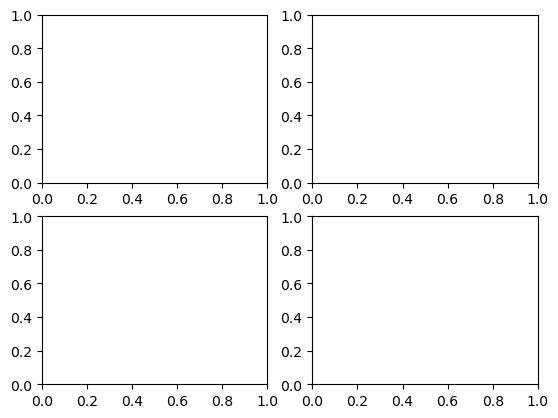

In [7]:
# Cria toda a figura na qual subplotagens serão inseridas
fig = plt.figure()

# Diz aá figura com as subplotagens deverão ser dispostas no exemplo,
# teremos 2 linhas de plotagens, e cada llinha terá 2 plotagens
# a subplotagem tem 2 linhas e 2 e 2 colunas, local 1 da plotagem
axes1 = fig.add_subplot(2, 2, 1)

# a subplotagem tem 2 linhas e 2 e 2 colunas, local 2 da plotagem
axes2 = fig.add_subplot(2, 2, 2)

# a subplotagem tem 2 linhas e 2 e 2 colunas, local 3 da plotagem
axes3 = fig.add_subplot(2, 2, 3)

# a subplotagem tem 2 linhas e 2 e 2 colunas, local 4 da plotagem
axes4 = fig.add_subplot(2, 2, 4)


Podemos usar o método `plot` em que cada eixo para criar a plotagem

In [8]:
# Adiciona um plotagem em cada um dos eixos criados
axes1.plot(dataset_1["x"], dataset_1["y"], "o")
axes2.plot(dataset_2["x"], dataset_2["y"], "o")
axes3.plot(dataset_3["x"], dataset_3["y"], "o")
axes4.plot(dataset_4["x"], dataset_4["y"], "o")

Colocar rótulo e usar `tight_layout` para garantir que os eixos estejam separados. Atençã

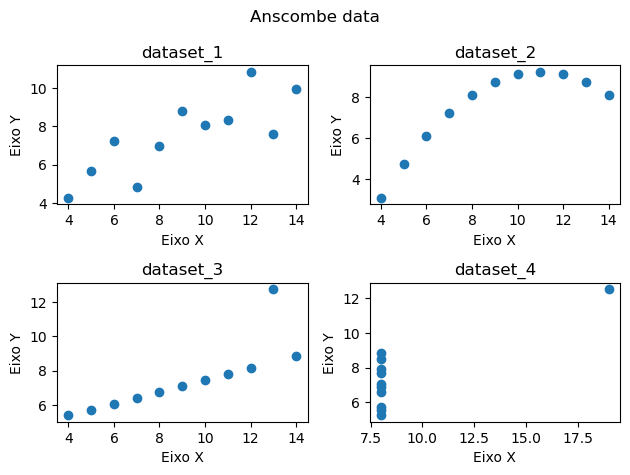

In [24]:
# %matplotlib notebook

# %matplotlib inline

# Acrescentar título
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

axes1.set_xlabel("Eixo X")
axes1.set_ylabel("Eixo Y")

axes2.set_xlabel("Eixo X")
axes2.set_ylabel("Eixo Y")

axes3.set_xlabel("Eixo X")
axes3.set_ylabel("Eixo Y")

axes4.set_xlabel("Eixo X")
axes4.set_ylabel("Eixo Y")

# Adicionar um título para toda a figura
fig.suptitle("Anscombe data")


# Usa um layout organizado
# fig.tight_layout()
fig

# plt.show()